In [62]:
from exp_util import load_json, plot_staircase_results
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from itertools import product
from scipy.interpolate import make_splrep
from scipy.signal import find_peaks_cwt, find_peaks
import ruptures as rpt

In [2]:
data = pd.read_csv("/home/maciek/data/counterfactual_dots/raw/pilot_data/counterfactual_staircase_test_L_1742812458.61419.csv")
data.head()

,subject,gender (m/f/o),age,block,trial_number,dots_direction,scale_direction,response_key,response_correct,opposite_strenght,opposite_label,step,signal_prop,scale_response,rt
0,test_L,o,69,0,0,0.0,1,right,True,0.15,high,8,0.625,82.53,NaN
1,test_L,o,69,0,1,0.0,0,right,True,0.05,low,16,0.525,61.25,NaN
2,test_L,o,69,0,2,180.0,1,left,True,0.15,high,8,0.625,74.46,0.455861
3,test_L,o,69,0,3,180.0,0,left,True,0.05,low,16,0.525,63.70,1.503228
4,test_L,o,69,0,4,180.0,1,left,True,0.05,low,20,0.425,84.48,NaN


In [3]:
plot_staircase_results(data, file_path="img.png")

'img.png'

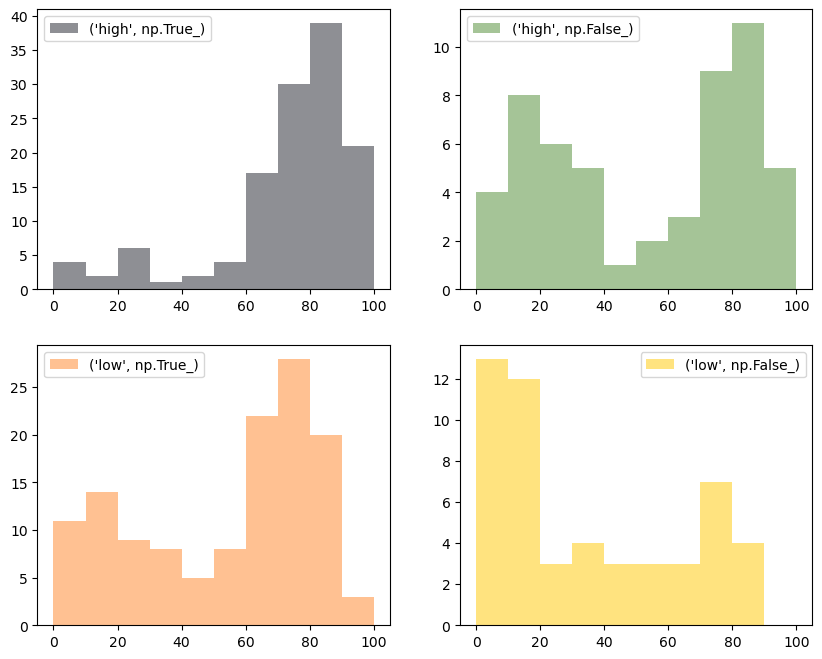

In [4]:
f, ax = plt.subplots(2, 2, figsize=(10, 8))
colors = ["#1E212B", "#4D8B31", "#FF8427", "#FFC800"]
ax = ax.flatten()
for ix, lab in enumerate(list(product(data.opposite_label.unique(), data.response_correct.unique()))):
    select = (data.opposite_label == lab[0]) & (data.response_correct == lab[1])
    ax[ix].hist(data.scale_response[select], color=colors[ix], label=str(lab), alpha=0.5, bins=np.linspace(0, 100, num=11))
    ax[ix].legend()

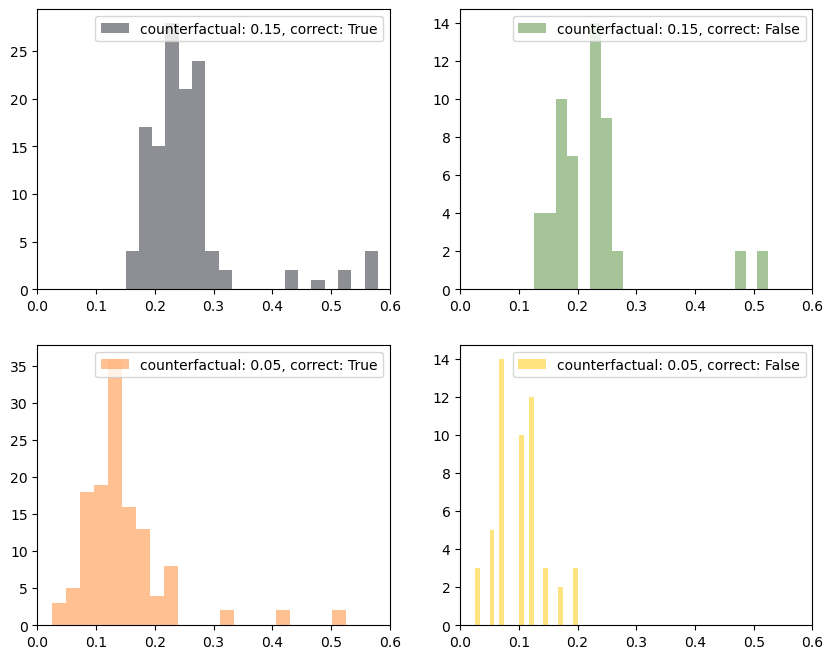

In [5]:
f, ax = plt.subplots(2, 2, figsize=(10, 8))
colors = ["#1E212B", "#4D8B31", "#FF8427", "#FFC800"]
ax = ax.flatten()
for ix, lab in enumerate(list(product(data.opposite_strenght.unique(), data.response_correct.unique()))):
    select = (data.opposite_strenght == lab[0]) & (data.response_correct == lab[1])
    ax[ix].hist(data.signal_prop[select], color=colors[ix], label=f"counterfactual: {str(lab[0])}, correct: {str(lab[1])}", alpha=0.5, bins=21)
    ax[ix].legend()
    ax[ix].set_xlim(0.0, 0.6)

In [6]:
trajectory_data = load_json("/home/maciek/data/counterfactual_dots/raw/pilot_data/counterfactual_staircase_test_L_1742812458.61419.json")


In [7]:
optimal_time = np.linspace(0, 3, num=3*240)

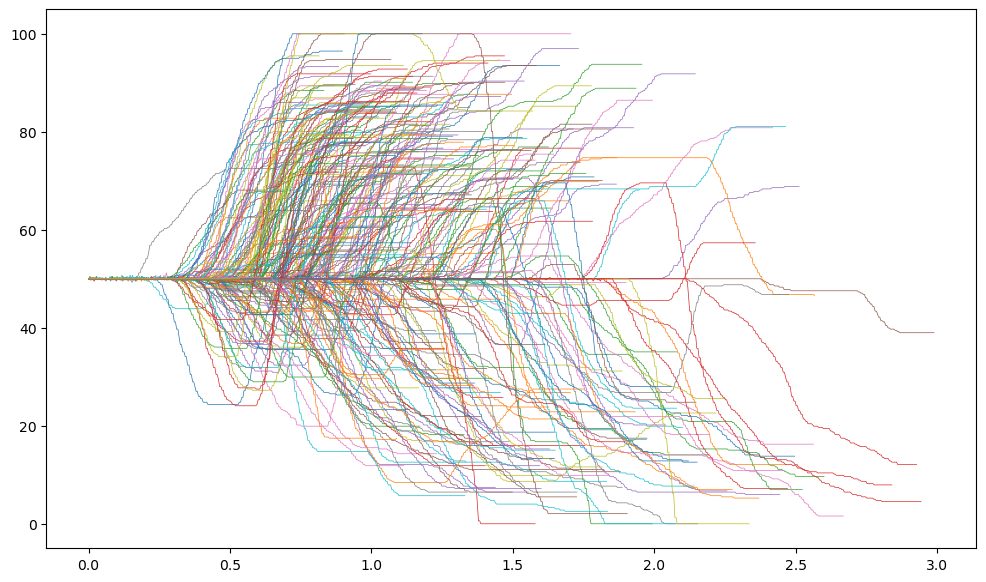

In [8]:
sel_ix = data.loc[
    (data.trial_number > 40)
].index.to_numpy()

scale_pos = [np.array(trajectory_data[str(i)]["scale_position"]) for i in sel_ix]
times = [np.array(trajectory_data[str(i)]["time"]) for i in sel_ix]
times = [i - i[0] for i in times]


f, ax = plt.subplots(1, 1, figsize=(12, 7))
for ix, i in enumerate(sel_ix):
    ax.plot(times[ix], scale_pos[ix], lw=0.5)

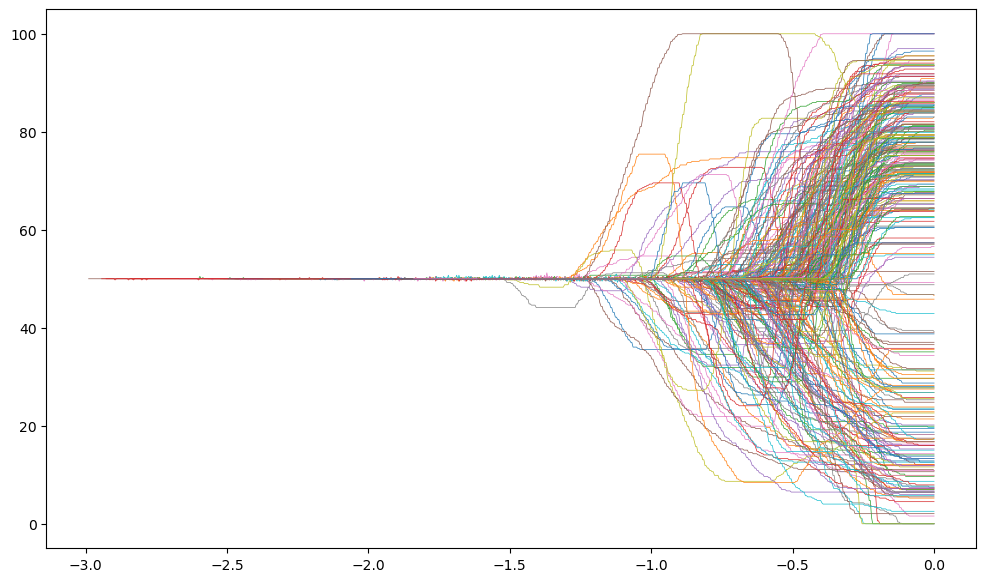

In [9]:
sel_ix = data.loc[
    (data.trial_number > 40)
].index.to_numpy()

scale_pos = [np.array(trajectory_data[str(i)]["scale_position"]) for i in sel_ix]
times = [np.array(trajectory_data[str(i)]["time"]) for i in sel_ix]
times = [i - i[-1] for i in times]


f, ax = plt.subplots(1, 1, figsize=(12, 7))
for ix, i in enumerate(sel_ix):
    ax.plot(times[ix], scale_pos[ix], lw=0.5)

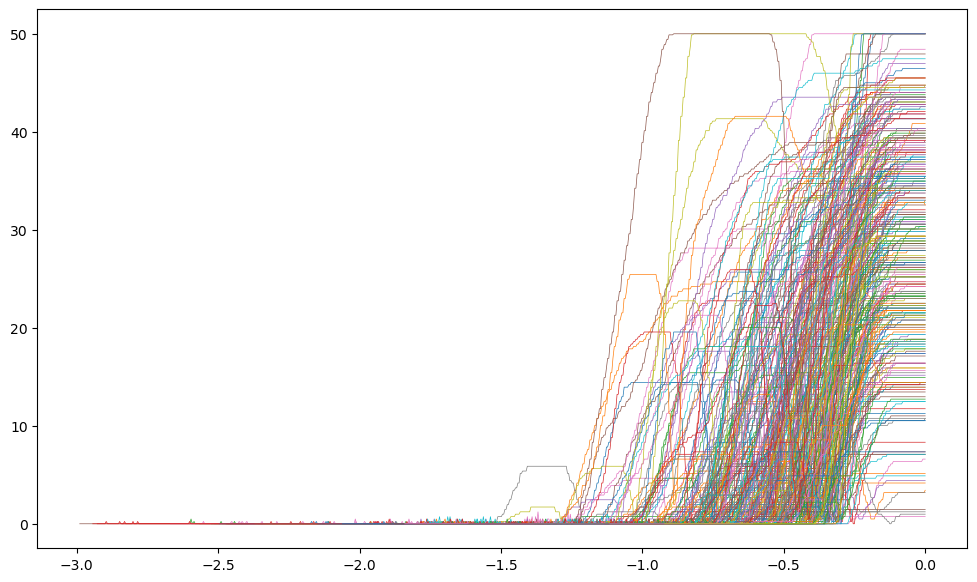

In [10]:
sel_ix = data.loc[
    (data.trial_number > 40)
].index.to_numpy()

scale_pos = [np.array(trajectory_data[str(i)]["scale_position"]) for i in sel_ix]
times = [np.array(trajectory_data[str(i)]["time"]) for i in sel_ix]
times = [i - i[-1] for i in times]


f, ax = plt.subplots(1, 1, figsize=(12, 7))
for ix, i in enumerate(sel_ix):
    ax.plot(times[ix], np.abs(scale_pos[ix] - 50), lw=0.5)

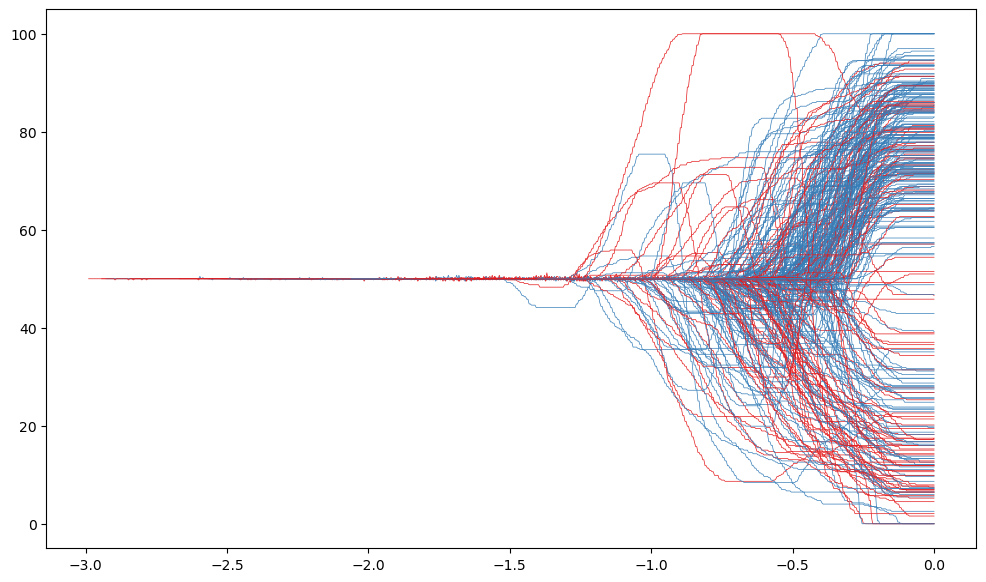

In [ ]:
value_set = np.linspace(0,1, num=10)[:-1]
color_set = plt.get_cmap("Set1")

sel_ix = data.loc[
    (data.trial_number > 40)
].index.to_numpy()

scale_pos = [np.array(trajectory_data[str(i)]["scale_position"]) for i in sel_ix]
times = [np.array(trajectory_data[str(i)]["time"]) for i in sel_ix]
times = [i - i[-1] for i in times]

col_label = data.loc[
    (data.trial_number > 40)
].response_correct.to_numpy()
# col_label[col_label] = value_set[0]
# col_label[~col_label] = value_set[-1]

f, ax = plt.subplots(1, 1, figsize=(12, 7))
for ix, i in enumerate(sel_ix):
    ax.plot(times[ix], scale_pos[ix], lw=0.5, c=color_set(col_label[ix]))

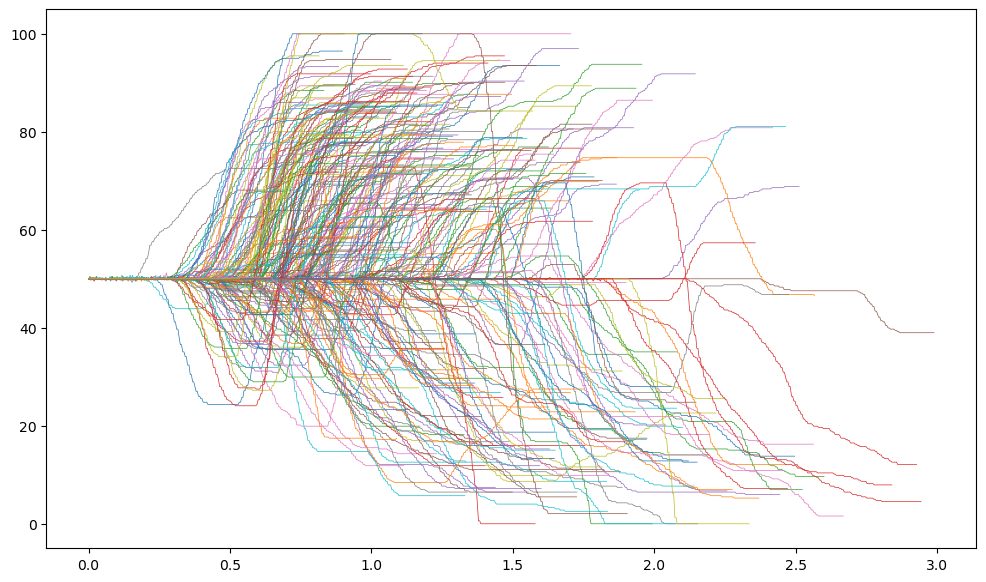

In [13]:
sel_ix = data.loc[
    (data.trial_number > 40)
].index.to_numpy()

scale_pos = [np.array(trajectory_data[str(i)]["scale_position"]) for i in sel_ix]
times = [np.array(trajectory_data[str(i)]["time"]) for i in sel_ix]
times = [i - i[0] for i in times]

f, ax = plt.subplots(1, 1, figsize=(12, 7))
for num in range(len(times)):
    
    ax.plot(times[num], scale_pos[num], lw=0.5)

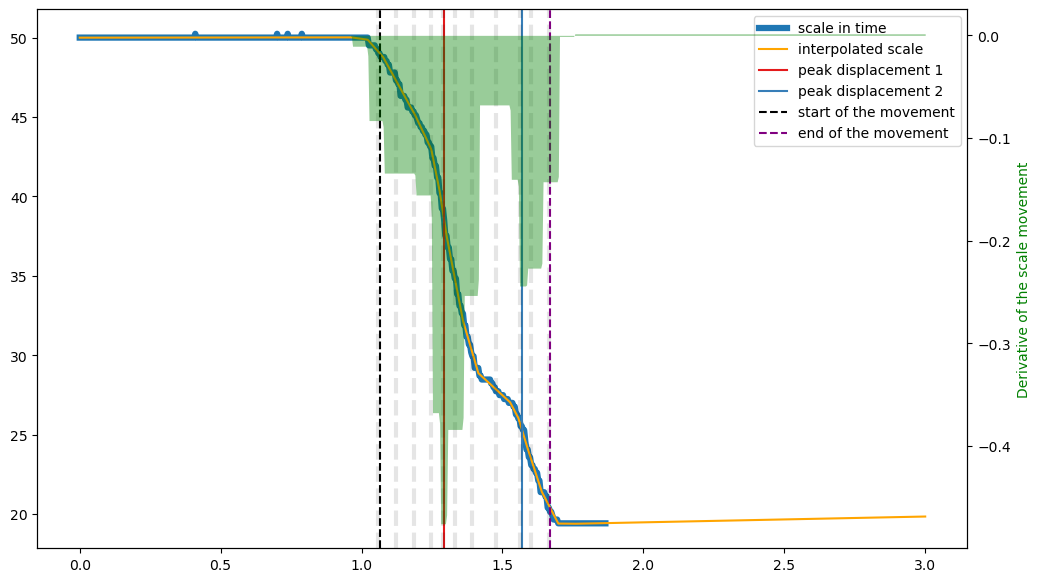

In [128]:
value_set = np.linspace(0,1, num=10)[:-1]
color_set = plt.get_cmap("Set1")

sel_ix = data.loc[
    (data.trial_number > 40)
].index.to_numpy()

scale_pos = [np.array(trajectory_data[str(i)]["scale_position"]) for i in sel_ix]
times = [np.array(trajectory_data[str(i)]["time"]) for i in sel_ix]
times = [i - i[0] for i in times]

f, ax = plt.subplots(1, 1, figsize=(12, 7))
num = 100
    
ax.plot(times[num], scale_pos[num], lw=4.5, label="scale in time")

interp = make_splrep(times[num], scale_pos[num], k=1, s=6)
scale_pos_interp = interp(optimal_time)
derivative = np.diff(interp(optimal_time))
peaks, characteristics = find_peaks(abs(derivative), prominence=(0.1, 1), distance=5)
peaks = peaks + 1
ax.plot(optimal_time, scale_pos_interp, label="interpolated scale", c="orange")

for ix, i in enumerate(peaks):
    ax.axvline(optimal_time[i], c=color_set(value_set[ix]), label=f"peak displacement {ix+1}")

algo = rpt.Pelt(model="l1").fit(scale_pos_interp)
ch_pts = algo.predict(pen=10)
ch_pts = np.array([i for i in ch_pts if not optimal_time[i-1] > times[num][-1]])
for ix, i in enumerate(ch_pts):
    ax.axvline(optimal_time[i-1], linestyle="dashed", c="black", alpha=0.1, lw=3)

ax.axvline(optimal_time[ch_pts[0]], linestyle="dashed", c="black", label="start of the movement")
ax.axvline(optimal_time[ch_pts[-1]], linestyle="dashed", c="purple", label="end of the movement")

# ax.axvline(data.iloc[num].rt, linestyle="dashed", c="magenta", label="directional response")



ax2 = ax.twinx()
ax2.fill_between(optimal_time[1:], derivative, np.zeros(derivative.shape), color="green", alpha=0.4, lw=0)

ax2.set_ylabel("Derivative of the scale movement", color="green")
ax.legend()

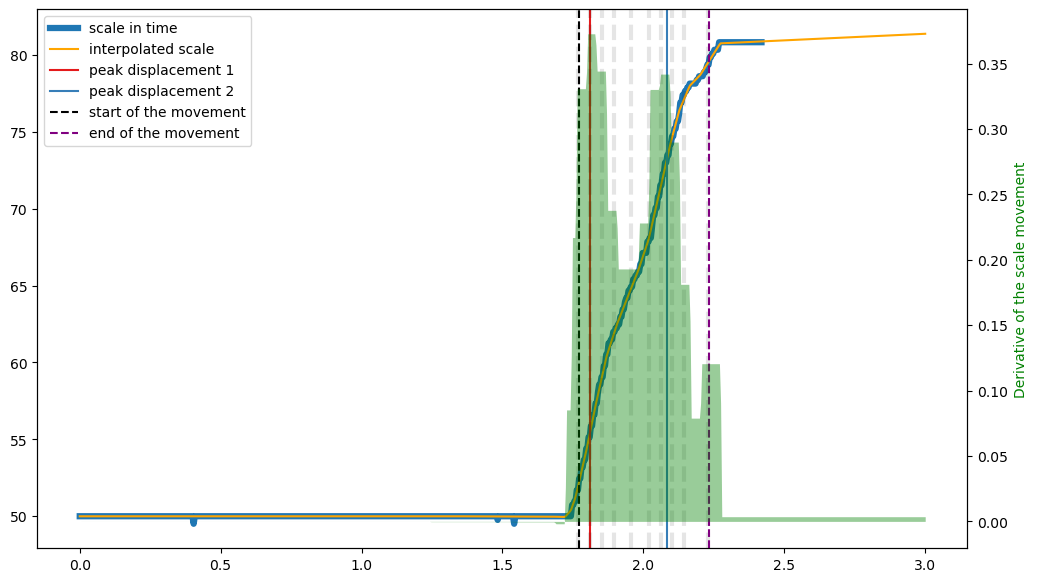

In [129]:
value_set = np.linspace(0,1, num=10)[:-1]
color_set = plt.get_cmap("Set1")

sel_ix = data.loc[
    (data.trial_number > 40)
].index.to_numpy()

scale_pos = [np.array(trajectory_data[str(i)]["scale_position"]) for i in sel_ix]
times = [np.array(trajectory_data[str(i)]["time"]) for i in sel_ix]
times = [i - i[0] for i in times]

f, ax = plt.subplots(1, 1, figsize=(12, 7))
num = 16
    
ax.plot(times[num], scale_pos[num], lw=4.5, label="scale in time")

interp = make_splrep(times[num], scale_pos[num], k=1, s=6)
scale_pos_interp = interp(optimal_time)
derivative = np.diff(interp(optimal_time))
peaks, characteristics = find_peaks(abs(derivative), prominence=(0.1, 1), distance=5)
peaks = peaks + 1
ax.plot(optimal_time, scale_pos_interp, label="interpolated scale", c="orange")

for ix, i in enumerate(peaks):
    ax.axvline(optimal_time[i], c=color_set(value_set[ix]), label=f"peak displacement {ix+1}")

algo = rpt.Pelt(model="l1").fit(scale_pos_interp)
ch_pts = algo.predict(pen=10)
ch_pts = np.array([i for i in ch_pts if not optimal_time[i-1] > times[num][-1]])
for ix, i in enumerate(ch_pts):
    ax.axvline(optimal_time[i-1], linestyle="dashed", c="black", alpha=0.1, lw=3)

ax.axvline(optimal_time[ch_pts[0]], linestyle="dashed", c="black", label="start of the movement")
ax.axvline(optimal_time[ch_pts[-1]], linestyle="dashed", c="purple", label="end of the movement")

# ax.axvline(data.iloc[num].rt, linestyle="dashed", c="magenta", label="directional response")



ax2 = ax.twinx()
ax2.fill_between(optimal_time[1:], derivative, np.zeros(derivative.shape), color="green", alpha=0.4, lw=0)

ax2.set_ylabel("Derivative of the scale movement", color="green")
ax.legend()

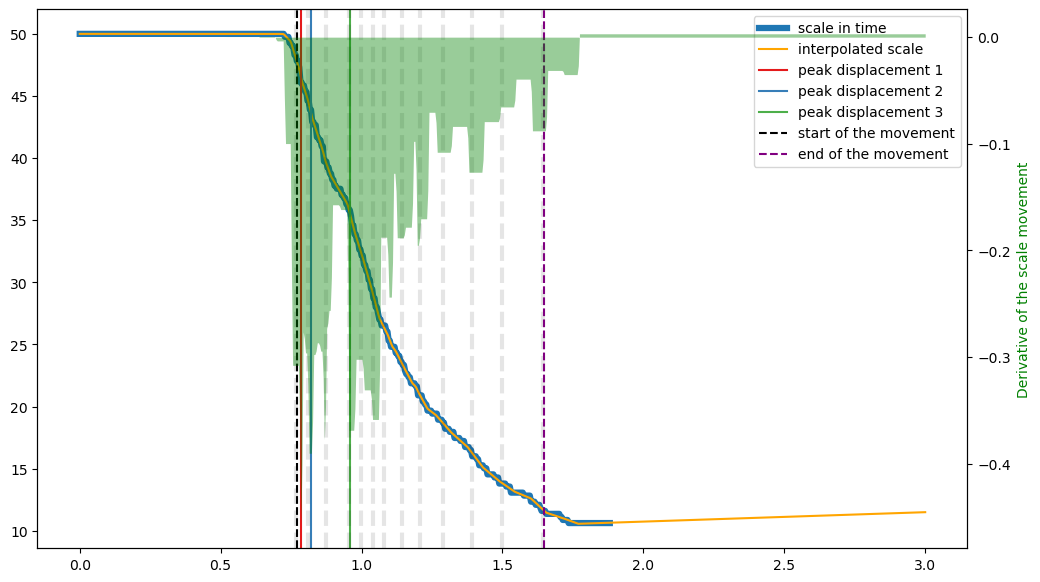

In [130]:
value_set = np.linspace(0,1, num=10)[:-1]
color_set = plt.get_cmap("Set1")

sel_ix = data.loc[
    (data.trial_number > 40)
].index.to_numpy()

scale_pos = [np.array(trajectory_data[str(i)]["scale_position"]) for i in sel_ix]
times = [np.array(trajectory_data[str(i)]["time"]) for i in sel_ix]
times = [i - i[0] for i in times]

f, ax = plt.subplots(1, 1, figsize=(12, 7))
num = 75
    
ax.plot(times[num], scale_pos[num], lw=4.5, label="scale in time")

interp = make_splrep(times[num], scale_pos[num], k=1, s=6)
scale_pos_interp = interp(optimal_time)
derivative = np.diff(interp(optimal_time))
peaks, characteristics = find_peaks(abs(derivative), prominence=(0.1, 1), distance=5)
peaks = peaks + 1
ax.plot(optimal_time, scale_pos_interp, label="interpolated scale", c="orange")

for ix, i in enumerate(peaks):
    ax.axvline(optimal_time[i], c=color_set(value_set[ix]), label=f"peak displacement {ix+1}")

algo = rpt.Pelt(model="l1").fit(scale_pos_interp)
ch_pts = algo.predict(pen=10)
ch_pts = np.array([i for i in ch_pts if not optimal_time[i-1] > times[num][-1]])
for ix, i in enumerate(ch_pts):
    ax.axvline(optimal_time[i-1], linestyle="dashed", c="black", alpha=0.1, lw=3)

ax.axvline(optimal_time[ch_pts[0]], linestyle="dashed", c="black", label="start of the movement")
ax.axvline(optimal_time[ch_pts[-1]], linestyle="dashed", c="purple", label="end of the movement")

# ax.axvline(data.iloc[num].rt, linestyle="dashed", c="magenta", label="directional response")



ax2 = ax.twinx()
ax2.fill_between(optimal_time[1:], derivative, np.zeros(derivative.shape), color="green", alpha=0.4, lw=0)

ax2.set_ylabel("Derivative of the scale movement", color="green")
ax.legend()

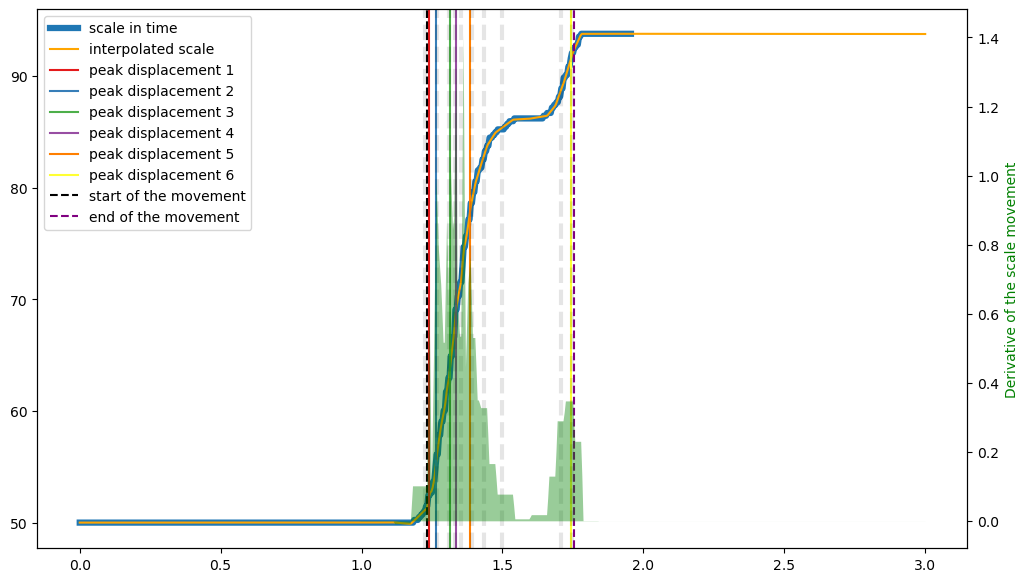

In [131]:
value_set = np.linspace(0,1, num=10)[:-1]
color_set = plt.get_cmap("Set1")

sel_ix = data.loc[
    (data.trial_number > 40)
].index.to_numpy()

scale_pos = [np.array(trajectory_data[str(i)]["scale_position"]) for i in sel_ix]
times = [np.array(trajectory_data[str(i)]["time"]) for i in sel_ix]
times = [i - i[0] for i in times]

f, ax = plt.subplots(1, 1, figsize=(12, 7))
num = 112
    
ax.plot(times[num], scale_pos[num], lw=4.5, label="scale in time")

interp = make_splrep(times[num], scale_pos[num], k=1, s=6)
scale_pos_interp = interp(optimal_time)
derivative = np.diff(interp(optimal_time))
peaks, characteristics = find_peaks(abs(derivative), prominence=(0.1, 1), distance=5)
peaks = peaks + 1
ax.plot(optimal_time, scale_pos_interp, label="interpolated scale", c="orange")

for ix, i in enumerate(peaks):
    ax.axvline(optimal_time[i], c=color_set(value_set[ix]), label=f"peak displacement {ix+1}")

algo = rpt.Pelt(model="l1").fit(scale_pos_interp)
ch_pts = algo.predict(pen=10)
ch_pts = np.array([i for i in ch_pts if not optimal_time[i-1] > times[num][-1]])
for ix, i in enumerate(ch_pts):
    ax.axvline(optimal_time[i-1], linestyle="dashed", c="black", alpha=0.1, lw=3)

ax.axvline(optimal_time[ch_pts[0]], linestyle="dashed", c="black", label="start of the movement")
ax.axvline(optimal_time[ch_pts[-1]], linestyle="dashed", c="purple", label="end of the movement")

# ax.axvline(data.iloc[num].rt, linestyle="dashed", c="magenta", label="directional response")



ax2 = ax.twinx()
ax2.fill_between(optimal_time[1:], derivative, np.zeros(derivative.shape), color="green", alpha=0.4, lw=0)

ax2.set_ylabel("Derivative of the scale movement", color="green")
ax.legend()

In [21]:
from exp_util import randomisation
from itertools import product
import numpy as np

n_trials = 360

conds = {i: v for i, v in enumerate(list(product([0.0, 180.0],[0,1], [0,1])))}
trial_conds = np.tile(np.arange(8), int(n_trials/8))
trial_order = randomisation(np.arange(8), N=2)



In [38]:
stair = []
for i in range(int(n_trials/4)):
    s = np.random.choice([0,1])
    stair.append(s)
    print(i, s)
    randomisation(np.arange(4), N=2)

print(np.array(stair).mean())

0 0
1 1
2 0
3 1
4 0
5 1
6 1
7 0
8 1
9 0
10 1
11 1
12 1
13 1
14 1
15 0
16 1
17 0
18 0
19 1
20 1
21 1
22 0
23 1
24 0
25 1
26 1
27 1
28 0
29 1
30 0
31 1
32 0
33 1
34 1
35 1
36 1
37 0
38 0
39 0
40 1
41 1
42 1
43 1
44 1
45 1
46 0
47 1
48 1
49 1
50 1
51 0
52 1
53 0
54 1
55 1
56 1
57 0
58 1
59 0
60 0
61 1
62 1
63 0
64 1
65 1
66 1
67 1
68 0
69 0
70 0
71 0
72 0
73 1
74 1
75 1
76 1
77 1
78 0
79 0
80 1
81 1
82 1
83 1
84 1
85 1
86 0
87 0
88 0
89 0
0.6222222222222222


In [39]:
staircasesss = np.tile(np.arange(2), int(n_trials/2))

[0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1
 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1
 1 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0
 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1
 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0
 1 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 1 0
 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0
 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1
 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0
 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1 0]


In [20]:
trial_order

array([3, 1, 6, 4, 5, 0, 7, 2])